In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [6]:
ab = pd.read_csv('Salary_Data (1).csv')
ab

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


EDA and Data Visualization

In [3]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


{'whiskers': [<matplotlib.lines.Line2D at 0x26292f839d0>,
 'caps': [<matplotlib.lines.Line2D at 0x26292f83f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x26292f83700>],
 'medians': [<matplotlib.lines.Line2D at 0x26293645550>],
 'fliers': [<matplotlib.lines.Line2D at 0x26293645820>],
 'means': []}

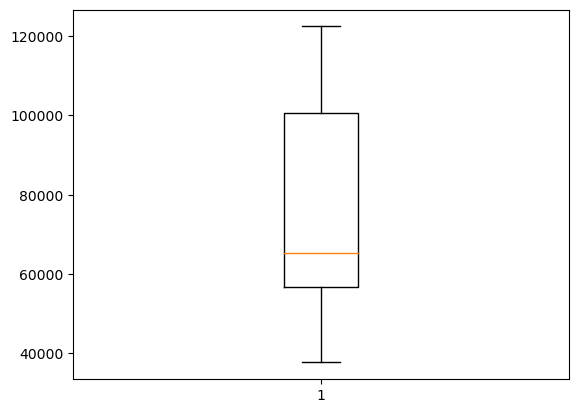

In [7]:
plt.boxplot(ab.Salary)

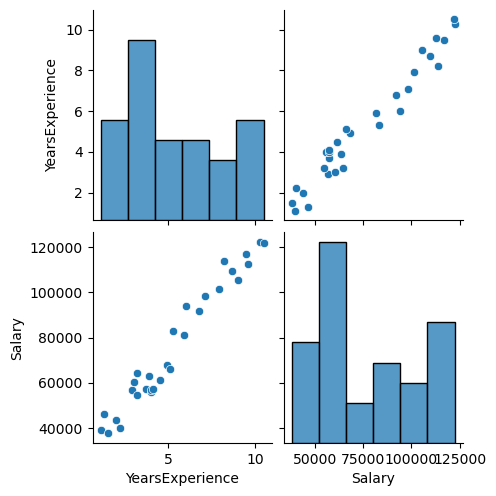

In [14]:
sns.pairplot(ab)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

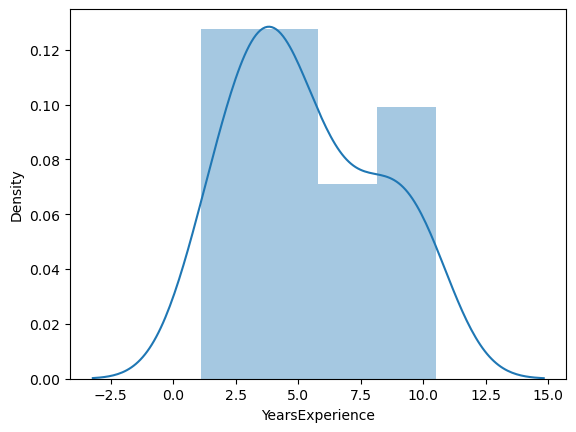

In [4]:

sns.distplot(ab['YearsExperience'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

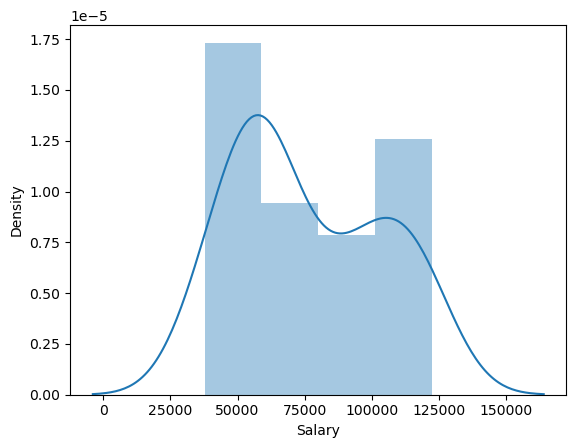

In [5]:
sns.distplot(ab['Salary'])

Correlation Analysis

In [6]:
ab.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

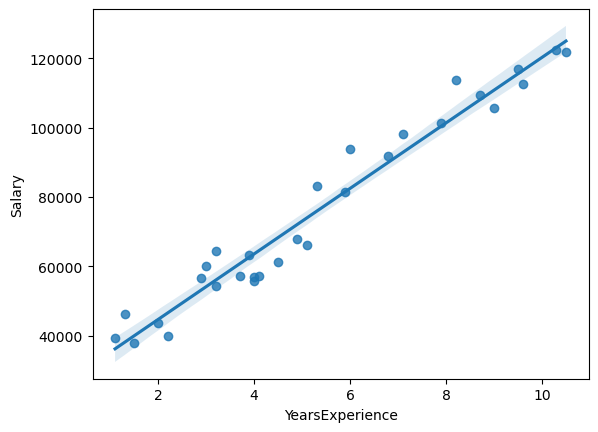

In [7]:
sns.regplot(x=ab['YearsExperience'],y=ab['Salary'])

In [16]:
model=smf.ols("Salary~YearsExperience", data= ab).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        01:23:22   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model1=smf.ols("Salary~np.log(YearsExperience)", data= ab).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        01:24:41   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model2=smf.ols("Salary~np.square(YearsExperience)", data= ab).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           1.52e-16
Time:                        01:25:43   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(YearsExperience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model3=smf.ols("Salary~np.sqrt(YearsExperience)", data= ab).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           8.57e-18
Time:                        01:26:22   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model Building

In [21]:
model4=smf.ols("Salary~np.log(np.sqrt(YearsExperience))", data= ab).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        01:27:09   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(np.sqrt(YearsExperience))  8.116e+04   6344.907     12.792      0.000    6.82e+04    9.42e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model=smf.ols("Salary~YearsExperience",data=ab).fit()

In [22]:
# Prediction for Salary hike

# As our model is the best performimng model we are using to predict the Salary hike

newdata=pd.Series([6,12,10])
dt_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
dt_pred

,YearsExperience
0,6
1,12
2,10


In [23]:
model.predict(dt_pred)

0     82491.974127
1    139191.748056
2    120291.823413
dtype: float64

In [9]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [10]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [24]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Model Predictions

In [12]:
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [13]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64